In [378]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import matplotlib as mpl
import seaborn as sns
import scipy.io as sio
import cartopy.crs as ccrs

In [349]:
#mpl.rcParams.keys()
project_path = '/Users/sebastian/Dropbox (MIT)/postdoc/'
sns.set(style='ticks',context='paper')
mpl.rc('figure', dpi=120, figsize=[10,5])
mpl.rc('savefig',dpi=500,bbox='tight',directory=os.path.join(project_path,'figures'))
mpl.rc('legend',frameon=False)

In [249]:
def load_file(file):
    return sio.loadmat(file,struct_as_record=True,squeeze_me=True)

def plot_traject(lon,lat,mat,floatid):
    f,ax=plt.subplots(1,1)

    h = ax.scatter(lon,lat,0.5,time,rasterized=True)
    plt.colorbar(h, ax=ax, label='Time')
    ax.set(xlabel='Longitude',ylabel='Latitude', title=f'Float ID {floatid}' );

    plt.savefig(project_path+f'/figures/float{floatid}_trajectory.pdf')
    plt.close()

In [356]:
ls ../data/NIWmatdata/

7700b.mat*      7780b.mat*      7783a.mat*      7786a.mat*      7788a.mat*
7700b_grid.mat* 7780b_grid.mat* 7783a_grid.mat* 7786a_grid.mat* 7788a_grid.mat*
7701b.mat*      7781a.mat*      7784b.mat*      7786b.mat*      Hmxl.mat*
7701b_grid.mat* 7781a_grid.mat* 7784b_grid.mat* 7786b_grid.mat* README*
7779a.mat*      7782b.mat*      7785b.mat*      7787a.mat*      ascat_wind.mat*
7779a_grid.mat* 7782b_grid.mat* 7785b_grid.mat* 7787a_grid.mat* copy_matdata.m*


In [359]:
a = load_file( floatfiles[0] )

In [370]:
a['A']['Pr'].flatten()[0].shape
a['A']['LON'].flatten()[0].shape

ValueError: no field of name LON

In [357]:
# plot individual trajectories

floatfiles = glob.glob(project_path+'data/NIWmatdata/*[a,b]_grid.mat')

for file in floatfiles:
    mat = load_file(file)
    
    lon = mat['GPS']['LON'].flatten()[0]
    lat = mat['GPS']['LAT'].flatten()[0]
    time = mat['GPS']['Jday_gmt'].flatten()[0]
    floatid = mat['floatid']
    
    plot_traject(lon,lat,mat,floatid)

KeyError: 'GPS'

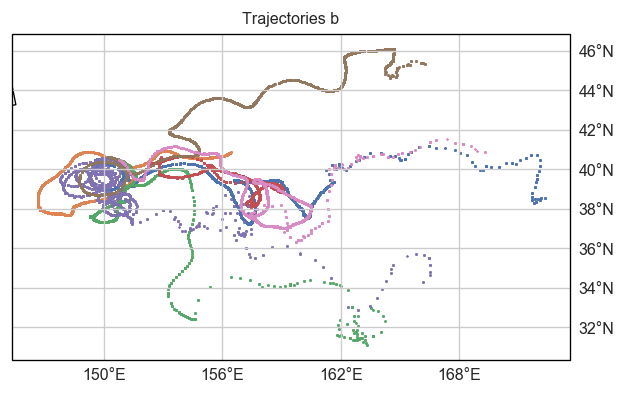

In [283]:
# plot a (b) in one plot
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

year='b'
floatfiles = glob.glob(project_path+f'data/NIWmatdata/*[{year}].mat')
f,ax=plt.subplots(1,1)
ax = plt.axes(projection=ccrs.PlateCarree())
for file in floatfiles:
    mat = load_file(file)
    
    lon = mat['GPS']['LON'].flatten()[0]
    lat = mat['GPS']['LAT'].flatten()[0]
    time = mat['GPS']['Jday_gmt'].flatten()[0]
    floatid = mat['floatid']
    
    h = ax.scatter(lon,lat,0.1,rasterized=True)
    ax.set(xlabel='Longitude',ylabel='Latitude', title=f'Trajectories {year}' );
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, alpha=1, linestyle='-')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.coastlines()    
ax.gridlines()
plt.savefig(project_path+f'/figures/float_trajectories_{year}.pdf')

In [153]:
chidf = pd.DataFrame(index=mat['CHI']['jday_gmt'].flatten()[0])

In [94]:
n2 = mat['CTD']['N2'].flatten()[0]
sig = mat['CTD']['Sigma'].flatten()[0]
p = mat['CTD']['P'].flatten()[0]

In [127]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

(1000, 566)

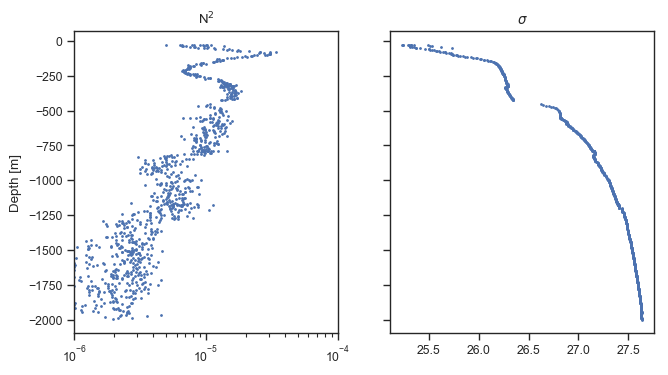

In [124]:
f,ax=plt.subplots(1,2,figsize=(7.48,4),sharey=True)

ax[0].plot(np.nanmedian( n2[:,:],1),-np.nanmedian( p[:,:],1), '.',ms=2)
ax[0].set(ylabel='Depth [m]',
          xscale='log',
          xlim=(1e-6,1e-4),
          title=r'N$^2$')

ax[1].plot(np.nanmedian( sig[:,:],1)-1000,-np.nanmedian( p[:,:],1), '.',ms=2)
ax[1].set(title=r'$\sigma$')
plt.show()

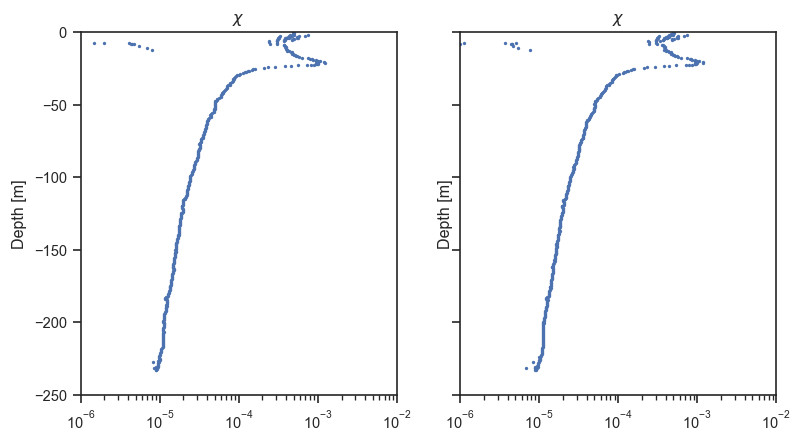

In [290]:
f,ax=plt.subplots(1,2,figsize=(7.48,4),sharey=True)

ax[0].plot(np.nanmedian( chi1[:,:],1),-np.nanmedian( chip[:,:],1), '.',ms=2)
ax[0].set(ylabel='Depth [m]',
          xscale='log',
          xlim=(1e-6,1e-2),
          ylim=(-250,0),
          title=r'$\chi$')

ax[1].plot(np.nanmedian( chi2[:,:],1),-np.nanmedian( chip[:,:],1), '.',ms=2)
ax[1].set(ylabel='Depth [m]',
          xscale='log',
          xlim=(1e-6,1e-2),
          ylim=(-250,0),
          title=r'$\chi$')
plt.show()

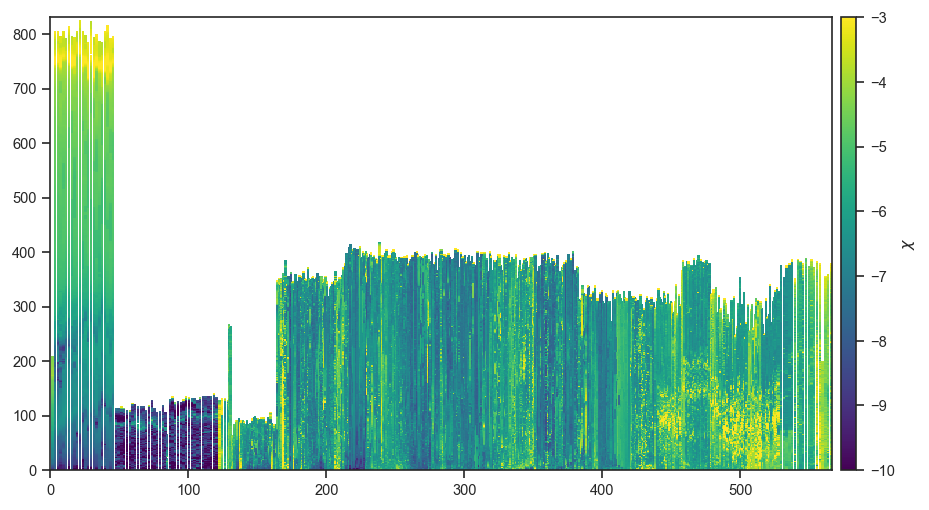

In [355]:
f,ax = plt.subplots(1,1)
h = ax.pcolormesh(np.log10(chi1),vmin=-10,vmax=-3,cmap='viridis',rasterized=True)
plt.colorbar(h,label='$\chi$',ax=ax,pad=0.01,aspect=30)
# ax.set(ylabel='Depth [m]')

plt.savefig('file.pdf')

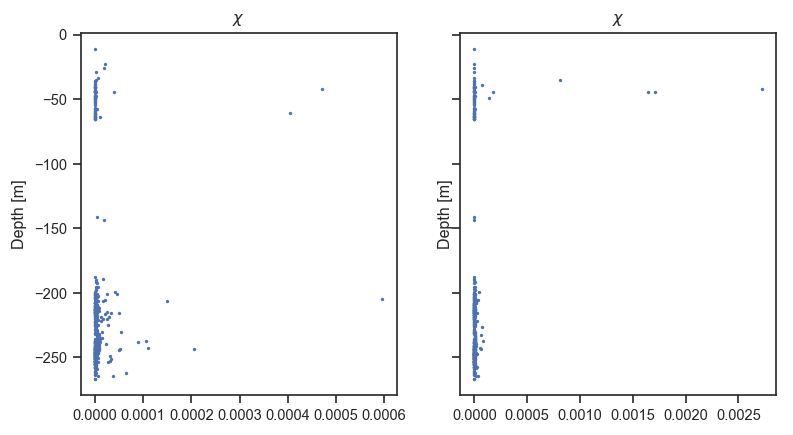

In [354]:
f,ax=plt.subplots(1,2,figsize=(7.48,4),sharey=True)

ax[0].plot(np.nanmedian( chi1[:,:],0),-np.nanmedian( chip[:,:],0), '.',ms=2)
ax[0].set(ylabel='Depth [m]',
#           xscale='log',
#           xlim=(1e-6,1e-2),
#           ylim=(-250,0),
          title=r'$\chi$')

ax[1].plot(np.nanmedian( chi2[:,:],0),-np.nanmedian( chip[:,:],0), '.',ms=2)
ax[1].set(ylabel='Depth [m]',
#           xscale='log',
#           xlim=(1e-6,1e-2),
#           ylim=(-250,0),
          title=r'$\chi$')
plt.show()